## Customer Churn Analysis

#### Importing required libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Demographics table
demographics = pd.read_excel("Telecommunications_Industry/demographics.xlsx")

# Location table
location = pd.read_excel("Telecommunications_Industry/location.xlsx")

# Status table
status = pd.read_excel("Telecommunications_Industry/status.xlsx")

# Services table
services = pd.read_excel("Telecommunications_Industry/services.xlsx")

# Population table
population = pd.read_excel("Telecommunications_Industry/population.xlsx")

### First Glance at the dataset

In [2]:
# Checking contents of demographics table
demographics.sample(5)

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
6438,0690-SRQID,1,Male,20,Yes,No,No,No,0
1922,3815-SLMEF,1,Female,26,Yes,No,No,No,0
6499,7328-ZJAJO,1,Female,19,Yes,No,Yes,Yes,2
268,0324-BRPCJ,1,Female,74,No,Yes,Yes,No,0
4330,9163-GHAYE,1,Female,34,No,No,No,No,0


In [3]:
# Checking contents of location table
location.sample(5)

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
4388,QRSOZY6733,6746-WAUWT,1,United States,California,Salida,95368,"37.713152, -121.08739",37.713152,-121.087390
2595,QXEDQX7819,7233-PAHHL,1,United States,California,South Gate,90280,"33.944624, -118.192615",33.944624,-118.192615
218,WXNYBP3294,2516-VQRRV,1,United States,California,Culver City,90230,"33.993991, -118.39704",33.993991,-118.397040
3308,PQWTXU9443,6077-BDPXA,1,United States,California,Merced,95340,"37.255637, -120.493537",37.255637,-120.493537
6825,VSPSMG4249,4566-NECEV,1,United States,California,Palos Verdes Peninsula,90274,"33.788208, -118.404955",33.788208,-118.404955


In [4]:
# Checking contents of services table
services.sample(5)

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
4278,SWVDFOOJO8616,7883-ROJOC,1,Q3,No,0,19,Offer D,Yes,34.51,...,Yes,Month-to-Month,No,Credit Card,44.90,839.65,0.0,0,655.69,1495.34
2060,NDQPMXQHY1636,7571-YXDAD,1,Q3,No,0,2,NaN,Yes,38.28,...,Yes,Month-to-Month,No,Credit Card,74.90,147.15,0.0,0,76.56,223.71
6909,THGZPFGIB5217,2005-DWQZJ,1,Q3,Yes,1,8,NaN,Yes,42.67,...,No,Two Year,No,Credit Card,19.05,201.70,0.0,0,341.36,543.06
1395,ZHCPXPARS9957,2408-TZMJL,1,Q3,Yes,1,59,Offer B,Yes,22.71,...,Yes,One Year,Yes,Bank Withdrawal,110.15,6448.05,0.0,0,1339.89,7787.94
4098,UOEYETZPG5226,0567-GGCAC,1,Q3,No,0,7,NaN,Yes,15.84,...,Yes,Month-to-Month,No,Bank Withdrawal,61.40,438.90,0.0,0,110.88,549.78


In [5]:
# Checking contents of population table
population.sample(5)

,ID,Zip Code,Population
166,167,91016,41067
1470,1471,95822,44683
1134,1135,95129,37570
364,365,92114,66838
1367,1368,95607,262


In [6]:
# Checking contents of status table
status.sample(5)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
6571,JSHRDB4919,5442-BHQNG,1,Q3,5,Joined,No,0,73,3430,NaN,NaN
3170,FWHRZA9685,3717-OFRTN,1,Q3,5,Joined,No,0,43,3595,NaN,NaN
1843,PMDXDD8637,4317-VTEOA,1,Q3,2,Churned,Yes,1,93,5355,Competitor,Competitor had better devices
1660,EKTNIL7791,6769-DCQLI,1,Q3,2,Churned,Yes,1,85,4630,Other,Don't know
3716,HHTZBG2371,4115-UMJFQ,1,Q3,5,Stayed,No,0,32,4043,NaN,NaN


### Performing Checks before Merging the table

In [7]:
# Checking for total data count
print(demographics.shape)
print(location.shape)
print(population.shape)
print(services.shape)
print(status.shape)

(7043, 9)
(7043, 10)
(1671, 3)
(7043, 31)
(7043, 12)


In [8]:
#Checking for duplicates 
print(location.duplicated().sum())
print(demographics.duplicated().sum())
print(population.duplicated().sum())
print(services.duplicated().sum())
print(status.duplicated().sum())


0
0
0
0
0


In [9]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location ID  7043 non-null   object 
 1   Customer ID  7043 non-null   object 
 2   Count        7043 non-null   int64  
 3   Country      7043 non-null   object 
 4   State        7043 non-null   object 
 5   City         7043 non-null   object 
 6   Zip Code     7043 non-null   int64  
 7   Lat Long     7043 non-null   object 
 8   Latitude     7043 non-null   float64
 9   Longitude    7043 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


In [10]:
demographics.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [11]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [12]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      1869 non-null   object
 11  Churn Reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


### Status table has multiple Nan values,
Reason: No Data exist for Not Churned customers

In [13]:
status.sample(10)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
3084,CBMLSA3653,6007-TCTST,1,Q3,3,Stayed,No,0,39,5841,NaN,NaN
6551,CROAFZ1847,7208-PSIHR,1,Q3,4,Stayed,No,0,70,5583,NaN,NaN
5630,QSRIAB5235,4182-BGSIQ,1,Q3,3,Stayed,No,0,49,3196,NaN,NaN
348,CAKKSE1775,6029-WTIPC,1,Q3,1,Churned,Yes,1,87,4424,Competitor,Competitor made better offer
1050,IJJYVQ3754,0282-NVSJS,1,Q3,4,Stayed,No,0,75,3353,NaN,NaN
5344,IISQEX4191,8680-CGLTP,1,Q3,3,Stayed,No,0,80,5198,NaN,NaN
4883,KSHNVJ4548,9738-QLWTP,1,Q3,4,Stayed,No,0,46,3446,NaN,NaN
380,LJJSGS2974,3096-JRDSO,1,Q3,1,Churned,Yes,1,75,3444,Competitor,Competitor made better offer
1428,ZXCULJ8639,7767-UXAGJ,1,Q3,3,Churned,Yes,1,68,2928,Competitor,Competitor made better offer
5865,HVXNTU9813,9507-HSMMZ,1,Q3,3,Stayed,No,0,41,6094,NaN,NaN


In [14]:
# status["Churn Category"].value_counts()
status["Churn Reason"].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [15]:
# Checking if there's another reason for nan values
count = status.loc[status['Churn Label'] == 'No', ['Churn Label', 'Churn Reason']].shape[0]
print("Total count:", count)


Total count: 5174


### Filling NaN values with "Not Churned"

In [16]:
# Filling "NaN" values with "Not Churned" in Churn Category column
status['Churn Category'] = status['Churn Category'].fillna('Not Churned')

# Filling "NaN" values with "Not Churned" in Churn Reason column
status['Churn Reason'] = status['Churn Reason'].fillna('Not Churned')
status.sample(5)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
4525,BRDWTO8739,9931-DCEZH,1,Q3,3,Stayed,No,0,74,4711,Not Churned,Not Churned
2902,JXAOSU6367,5756-JYOJT,1,Q3,3,Stayed,No,0,49,3206,Not Churned,Not Churned
2158,JGLTIS1211,9048-JVYVF,1,Q3,2,Churned,Yes,1,91,3520,Other,Don't know
967,ZJTRWN8622,4282-ACRXS,1,Q3,3,Stayed,No,0,33,3511,Not Churned,Not Churned
5053,IIHIAY1895,2139-FQHLM,1,Q3,5,Stayed,No,0,35,3402,Not Churned,Not Churned


### Fixing Datatypes 

In [17]:
location = location.astype({col: 'string' for col in location.select_dtypes(include='object').columns})
demographics = demographics.astype({col: 'string' for col in demographics.select_dtypes(include='object').columns})
status = status.astype({col: 'string' for col in status.select_dtypes(include='object').columns})
services = services.astype({col: 'string' for col in services.select_dtypes(include='object').columns})

## Merging Tables

In [18]:
# Quick merge with 3 essential safeguards
data = (
    demographics.merge(services, on='Customer ID', how='left', validate='one_to_one')
               .merge(status, on='Customer ID', how='left', suffixes=('', '_status'))
               .merge(location, on='Customer ID', how='left', suffixes=('', '_location'))
)

# Post-merge validation
assert len(data) == len(demographics), "Row count changed unexpectedly!"
print("Merge successful. Sample:")
data.sample(6)

Merge successful. Sample:


,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Service ID,...,Churn Reason,Location ID,Count_location,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
6385,3460-TJBWI,1,Male,58,No,No,Yes,Yes,3,FRCHPHUKS6532,...,Not Churned,SKFXNY3715,1,United States,California,Marshall,94940,"38.129308, -122.834815",38.129308,-122.834815
1454,0637-YLETY,1,Female,39,No,No,No,No,0,IIPAZDZWG7287,...,Attitude of service provider,CNZTCA1174,1,United States,California,Douglas City,96024,"40.586588, -122.903677",40.586588,-122.903677
4281,4635-EJYPD,1,Male,39,No,No,Yes,Yes,1,NYITJXDQU1558,...,Not Churned,NYDJKX9892,1,United States,California,Tomales,94971,"38.240769, -122.901041",38.240769,-122.901041
3514,8096-LOIST,1,Female,57,No,No,No,No,0,AHSFMMQUS2665,...,Not Churned,DAEFBP3257,1,United States,California,Stirling City,95978,"39.904002, -121.527823",39.904002,-121.527823
5464,4625-XMOYM,1,Female,37,No,No,Yes,Yes,1,MLHFGZLUF1451,...,Not Churned,BPMCLS8928,1,United States,California,Annapolis,95412,"38.731055, -123.316553",38.731055,-123.316553
1323,6680-WKXRZ,1,Female,32,No,No,No,No,0,LUTJLQBSX5555,...,Don't know,BEYOFK5149,1,United States,California,Antioch,94509,"37.980057, -121.801599",37.980057,-121.801599


In [19]:
data.shape

(7043, 59)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   string 
 1   Count_x                            7043 non-null   int64  
 2   Gender                             7043 non-null   string 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   string 
 5   Senior Citizen                     7043 non-null   string 
 6   Married                            7043 non-null   string 
 7   Dependents                         7043 non-null   string 
 8   Number of Dependents               7043 non-null   int64  
 9   Service ID                         7043 non-null   string 
 10  Count_y                            7043 non-null   int64  
 11  Quarter                            7043 non-null   strin

In [21]:
# Dropping columns "Redundant, high cardinality or not relateable to our objectives" 
data = data.drop(['Customer ID','Count_x','Under 30','Service ID','Count_y','Quarter','Status ID','Count','Quarter_status',
                  'Location ID','Count_location','Lat Long','Latitude','Longitude'], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   string 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   string 
 3   Married                            7043 non-null   string 
 4   Dependents                         7043 non-null   string 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   string 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Offer                              3166 non-null   string 
 10  Phone Service                      7043 non-null   string 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

In [23]:
# This is merged data (identified new null values)
data.isnull().sum()

Gender                                  0
Age                                     0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

### After Merging we have two new columns with null vales
#### Internet Type with 1526 (Reason: People who did not opt for internet services has missing records in internet service)
#### Offer 3877

In [24]:
# Set 'Internet Type' as 'Not applicable' where 'Internet Service' is 'No'
# Filling Null values
data.loc[data['Internet Service'] == 'No', 'Internet Type'] = 'Not applicable'


In [25]:
data.isnull().sum()

Gender                                  0
Age                                     0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [26]:
# Unique value counts for satisfaction Score
data["Satisfaction Score"].value_counts()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

### Overall customers distribution based on churn

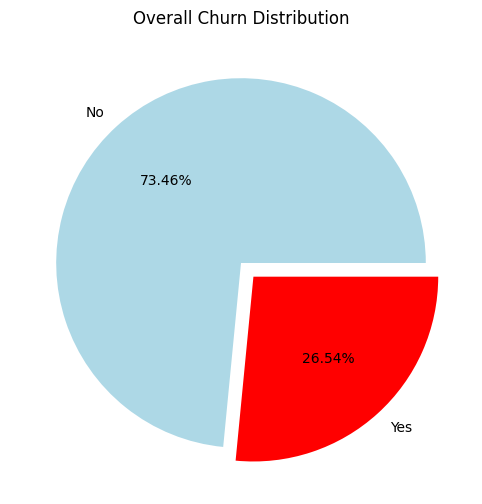

In [27]:
# Initial Analysis
churn_label_count = data["Churn Label"].value_counts()
fig = plt.figure(figsize=(10, 6), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Overall Churn Distribution")
plt.show()

<Figure size 1500x900 with 0 Axes>

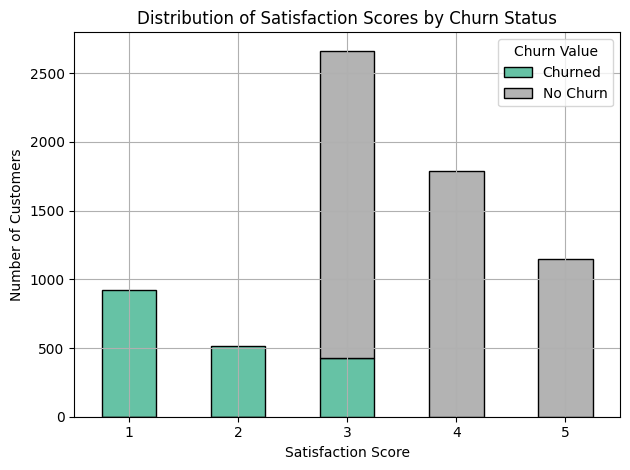

In [28]:
# Q1.  Q1. Churn Status vs. Customer Satisfaction How does the churn status vary with customer satisfaction scores 
crosstab = pd.crosstab(data['Satisfaction Score'], data['Churn Value'])

# Rename columns (0 = No Churn, 1 = Churned)
crosstab.columns = ['No Churn', 'Churned']

# Reorder columns to plot 'Churned' first
crosstab = crosstab[['Churned', 'No Churn']]

# Plot the stacked bar chart
plt.figure(figsize=(15, 9))
crosstab.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black')

plt.title('Distribution of Satisfaction Scores by Churn Status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Value')
plt.tight_layout()
plt.grid()
plt.show()

#### Key Insights:
Low Satisfaction (Scores 1-2): Almost every customer in this group churned, indicating an
exceptionally high churn risk.

High Satisfaction (Scores 4-5): No churn observed — these scores are highly predictive of customer
retention.

Mid Satisfaction (Score 3): Acts as a tipping point — majority retained, but a noticeable minority still
churned.

Overall: Satisfaction Score is a highly reliable predictor of churn behavior in this dataset.

In [29]:
#Descrptive stats
data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Zip Code
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,93486.071134
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,1856.768045
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,90001.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,92101.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,93518.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,95329.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,96150.000000


In [30]:
# Unique values available in Internet Type
data["Internet Type"].value_counts()

Internet Type
Fiber Optic       3035
DSL               1652
Not applicable    1526
Cable              830
Name: count, dtype: Int64

In [31]:
# Unique values available in Churn Label
data["Churn Label"].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: Int64

In [32]:
pd.crosstab(
    index=[data['Streaming TV'], data['Streaming Movies'], data['Streaming Music']],
    columns=data['Churn Label'],
    normalize='index'
).style.format('{:.1%}')

/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/2863377671.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = data.groupby('Tenure Bin')['Churn Label'].apply(


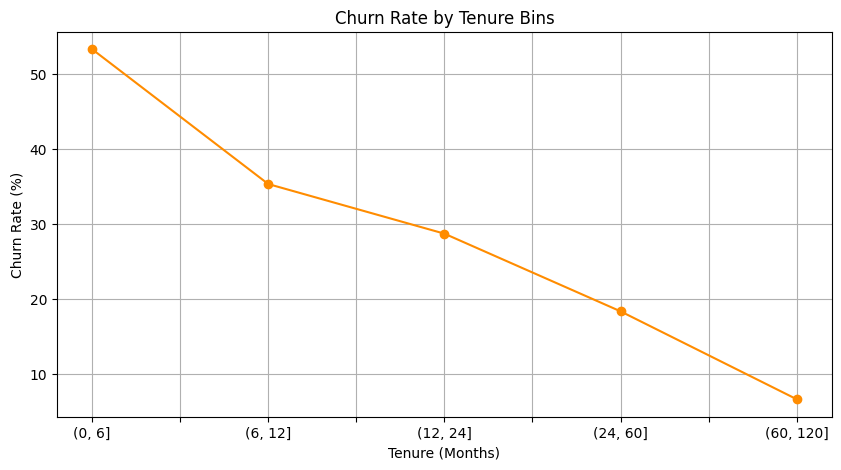

In [33]:
# Q6. Churn Rate vs. Customer Tenure What is the correlation between customer tenure and churn rate?

# Bin tenure into groups (6 month, year, two years ...)
data['Tenure Bin'] = pd.cut(data['Tenure in Months'], bins=[0, 6, 12, 24, 60, 120])

# Calculate churn rate per bin
churn_rate = data.groupby('Tenure Bin')['Churn Label'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

# Plot
plt.figure(figsize=(10, 5))
churn_rate.plot(kind='line', marker='o', color='darkorange')
plt.title('Churn Rate by Tenure Bins')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()

In [34]:
# Unique values available in Phone Services
data['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: Int64

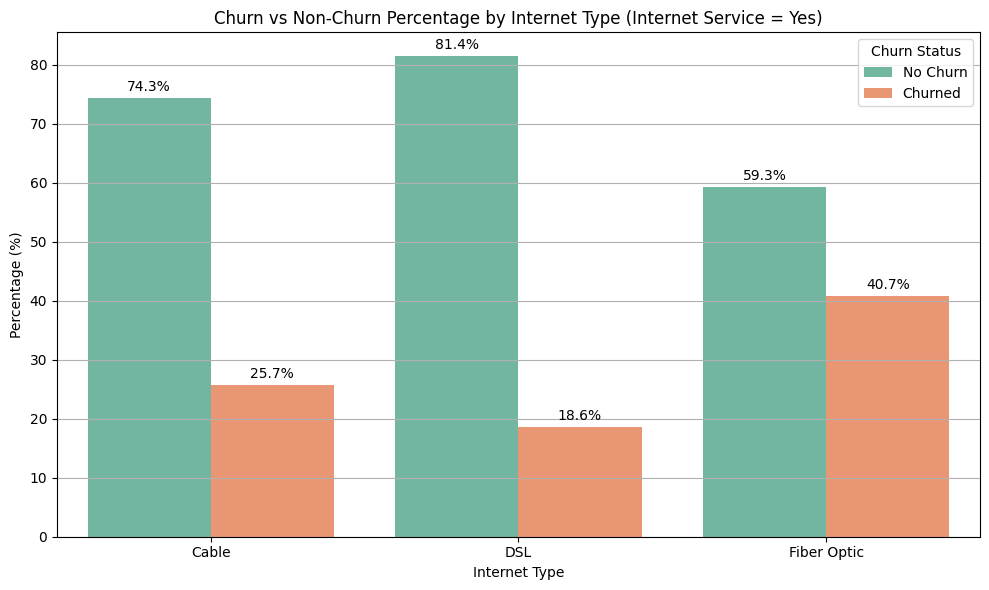

In [35]:
filtered_data = data[data['Internet Service'] == 'Yes']
crosstab = pd.crosstab(filtered_data['Internet Type'], filtered_data['Churn Label'])

# Rename columns
crosstab.columns = ['No Churn', 'Churned']

# Calculate percentage
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Reshape for seaborn
crosstab_percent = crosstab_percent.reset_index().melt(
    id_vars='Internet Type', 
    value_vars=['No Churn', 'Churned'], 
    var_name='Churn Status', 
    value_name='Percentage'
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=crosstab_percent, 
    x='Internet Type', 
    y='Percentage', 
    hue='Churn Status', 
    palette='Set2'
)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.title('Churn vs Non-Churn Percentage by Internet Type (Internet Service = Yes)')
plt.xlabel('Internet Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn Status')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/3058512325.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn.index, y=age_churn['Churn Rate (%)'], palette='coolwarm')


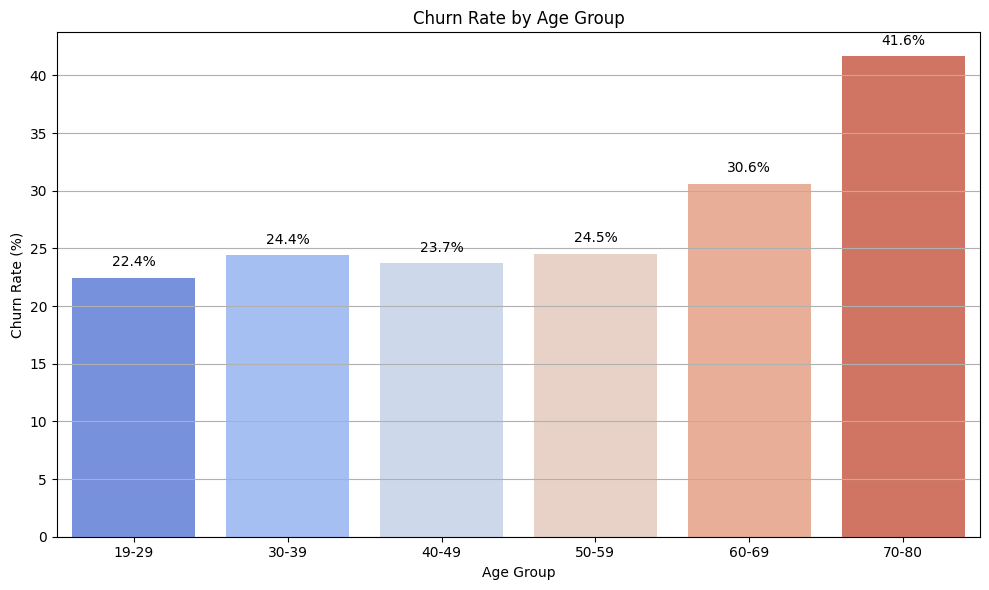

In [36]:

# Age data distribution w.r.t churn in bins of size 10
bins = [19, 29, 39, 49, 59, 69, 80]
labels = ['19-29', '30-39', '40-49', '50-59', '60-69', '70-80']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

age_churn = pd.crosstab(data['Age Group'], data['Churn Label'])
age_churn['Churn Rate (%)'] = age_churn['Yes'] / (age_churn['Yes'] + age_churn['No']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn.index, y=age_churn['Churn Rate (%)'], palette='coolwarm')

for i, rate in enumerate(age_churn['Churn Rate (%)']):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')

plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [37]:
# Value counts of age
data["Age"].value_counts()

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/2043612579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


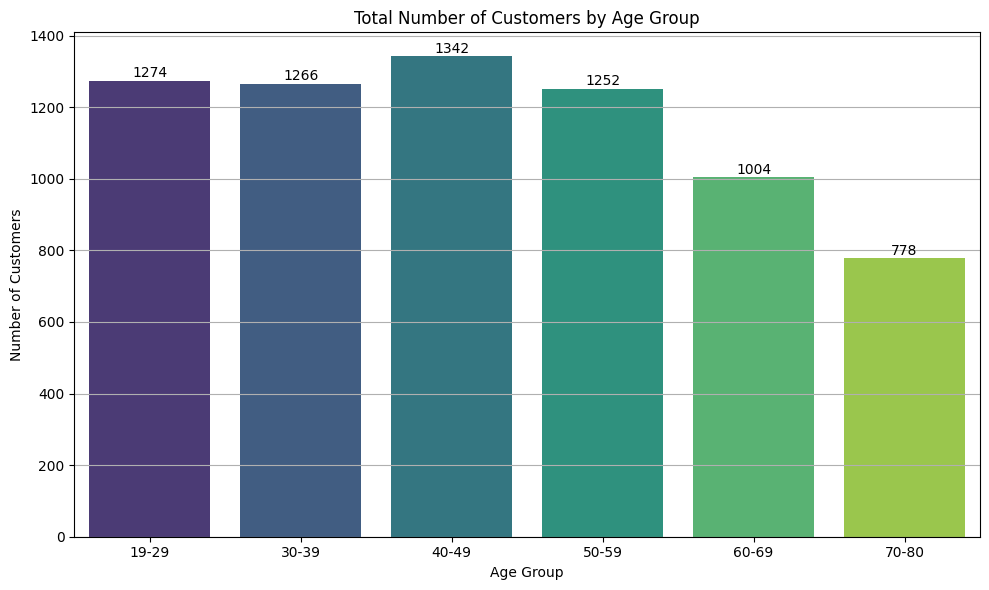

In [38]:
# Age data distribution in bins of size 10
age_group_counts = data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

for i, count in enumerate(age_group_counts.values):
    plt.text(i, count + 10, f'{count}', ha='center')

plt.title('Total Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



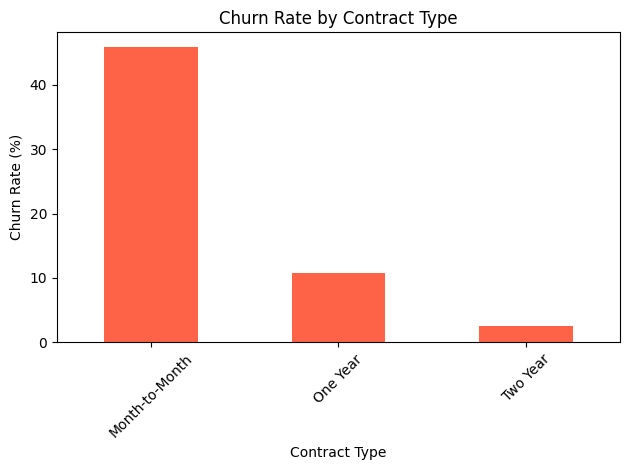

In [39]:
 
# Calculate churn rate per Contract type
churn_rate = data.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_percent = churn_rate * 100  # convert to percentage

# Plot churn rate for "Yes"
churn_rate_percent['Yes'].plot(kind='bar', color='tomato')

plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [40]:
# Finding Average of Tenure in Months
average_tenure_churned = data.loc[data['Churn Label'] == 'Yes', 'Tenure in Months'].mean()
print(f"Average Tenure (Churned Customers): {average_tenure_churned:.2f} months")


Average Tenure (Churned Customers): 17.98 months


/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/3275844816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['Churn Label'] == 'Yes'], x='Churn Category', palette='Set2')


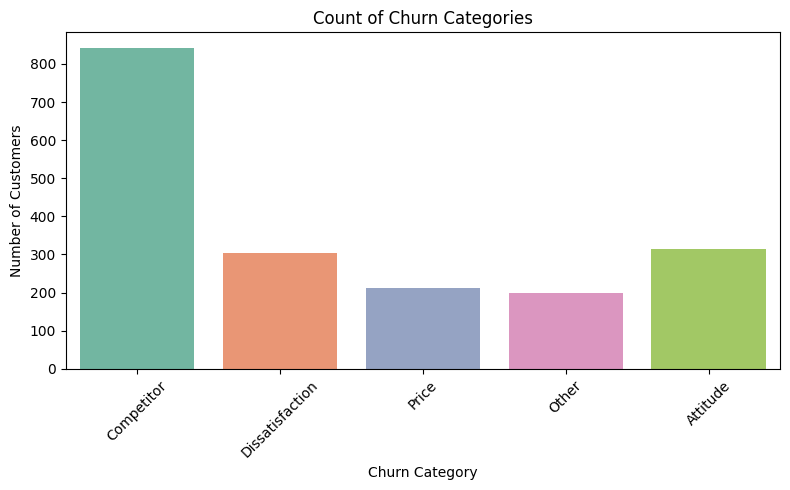

In [41]:
#  churn categories data distribution
plt.figure(figsize=(8, 5))

# Bar plot for Churn Category
sns.countplot(data=data[data['Churn Label'] == 'Yes'], x='Churn Category', palette='Set2')

plt.title('Count of Churn Categories')
plt.xlabel('Churn Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/1942812087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['Churn Label'] == 'Yes'], y='Churn Reason', palette='coolwarm', order=data['Churn Reason'].value_counts().index)


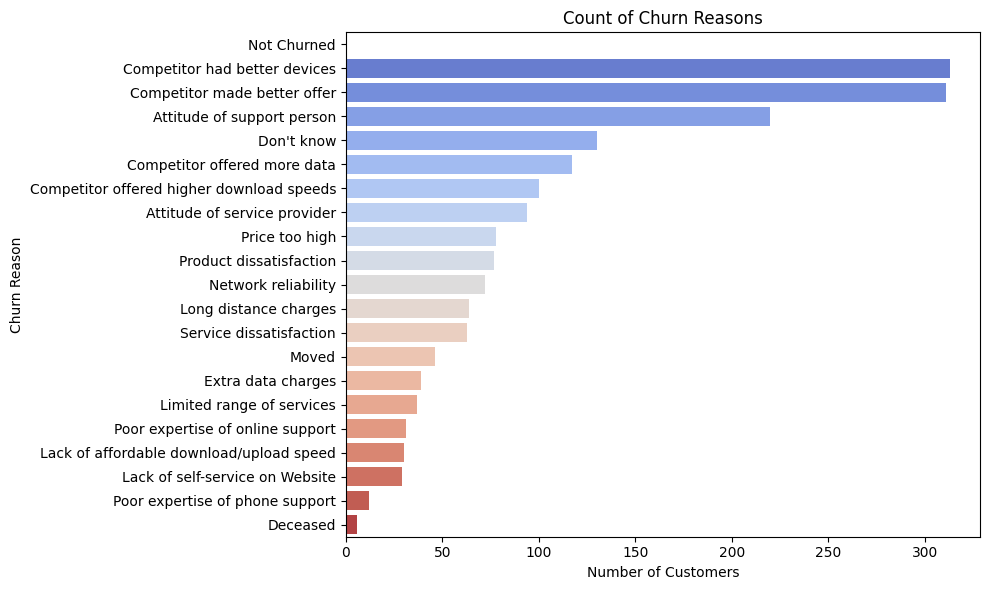

In [42]:
plt.figure(figsize=(10, 6))

# Bar plot for Churn Reason
sns.countplot(data=data[data['Churn Label'] == 'Yes'], y='Churn Reason', palette='coolwarm', order=data['Churn Reason'].value_counts().index)

plt.title('Count of Churn Reasons')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()


In [43]:
# Create a new calculated column
data['Calculated Charges'] = data['Tenure in Months'] * data['Monthly Charge']

# Compare with Total Charges
difference = data['Total Charges'] - data['Calculated Charges']

# Add a column showing the difference
data['Charge Difference'] = difference

# Show a sample
data[['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Calculated Charges', 'Charge Difference']].head()


,Tenure in Months,Monthly Charge,Total Charges,Calculated Charges,Charge Difference
0,1,39.65,39.65,39.65,0.00
1,8,80.65,633.30,645.20,-11.90
2,18,95.45,1752.55,1718.10,34.45
3,25,98.50,2514.50,2462.50,52.00
4,37,76.50,2868.15,2830.50,37.65


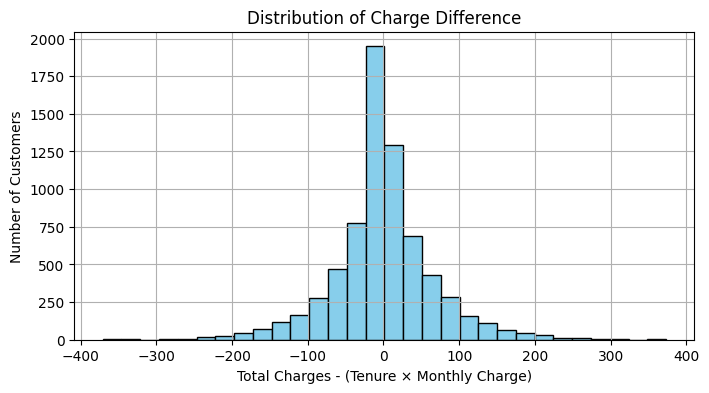

In [44]:
 

plt.figure(figsize=(8, 4))
plt.hist(data['Charge Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charge Difference')
plt.xlabel('Total Charges - (Tenure × Monthly Charge)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()



=== Univariate Analysis for: Paperless Billing ===
count     7043
unique       2
top        Yes
freq      4171
Name: Paperless Billing, dtype: object
Missing values: 0


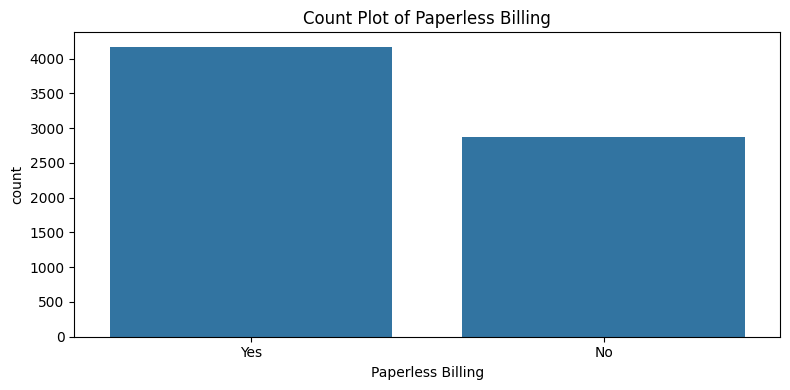


=== Univariate Analysis for: Payment Method ===
count                7043
unique                  3
top       Bank Withdrawal
freq                 3909
Name: Payment Method, dtype: object
Missing values: 0


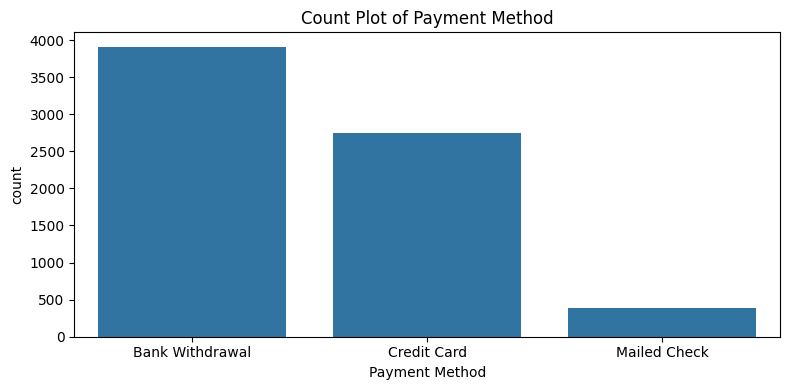

In [45]:
# Payment
selected_columns = ['Paperless Billing', 'Payment Method']  # Add your column names here

# Loop through each selected column
for col in selected_columns:
    print(f"\n=== Univariate Analysis for: {col} ===")
    print(data[col].describe())
    print("Missing values:", data[col].isnull().sum())

    # Plot based on data type
    plt.figure(figsize=(8, 4))
    if data[col].dtype == 'object' or data[col].nunique() < 10:
        sns.countplot(data=data, x=col)
        plt.title(f'Count Plot of {col}')
    else:
        sns.histplot(data=data, x=col, kde=True)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

In [46]:
data.nunique()

Gender                                  2
Age                                    62
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                    

### Bivariate

/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/225462564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn Label', y=column, ax=ax, palette=boxplot_palette)
/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/225462564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn Label', y=column, ax=ax, palette=boxplot_palette)


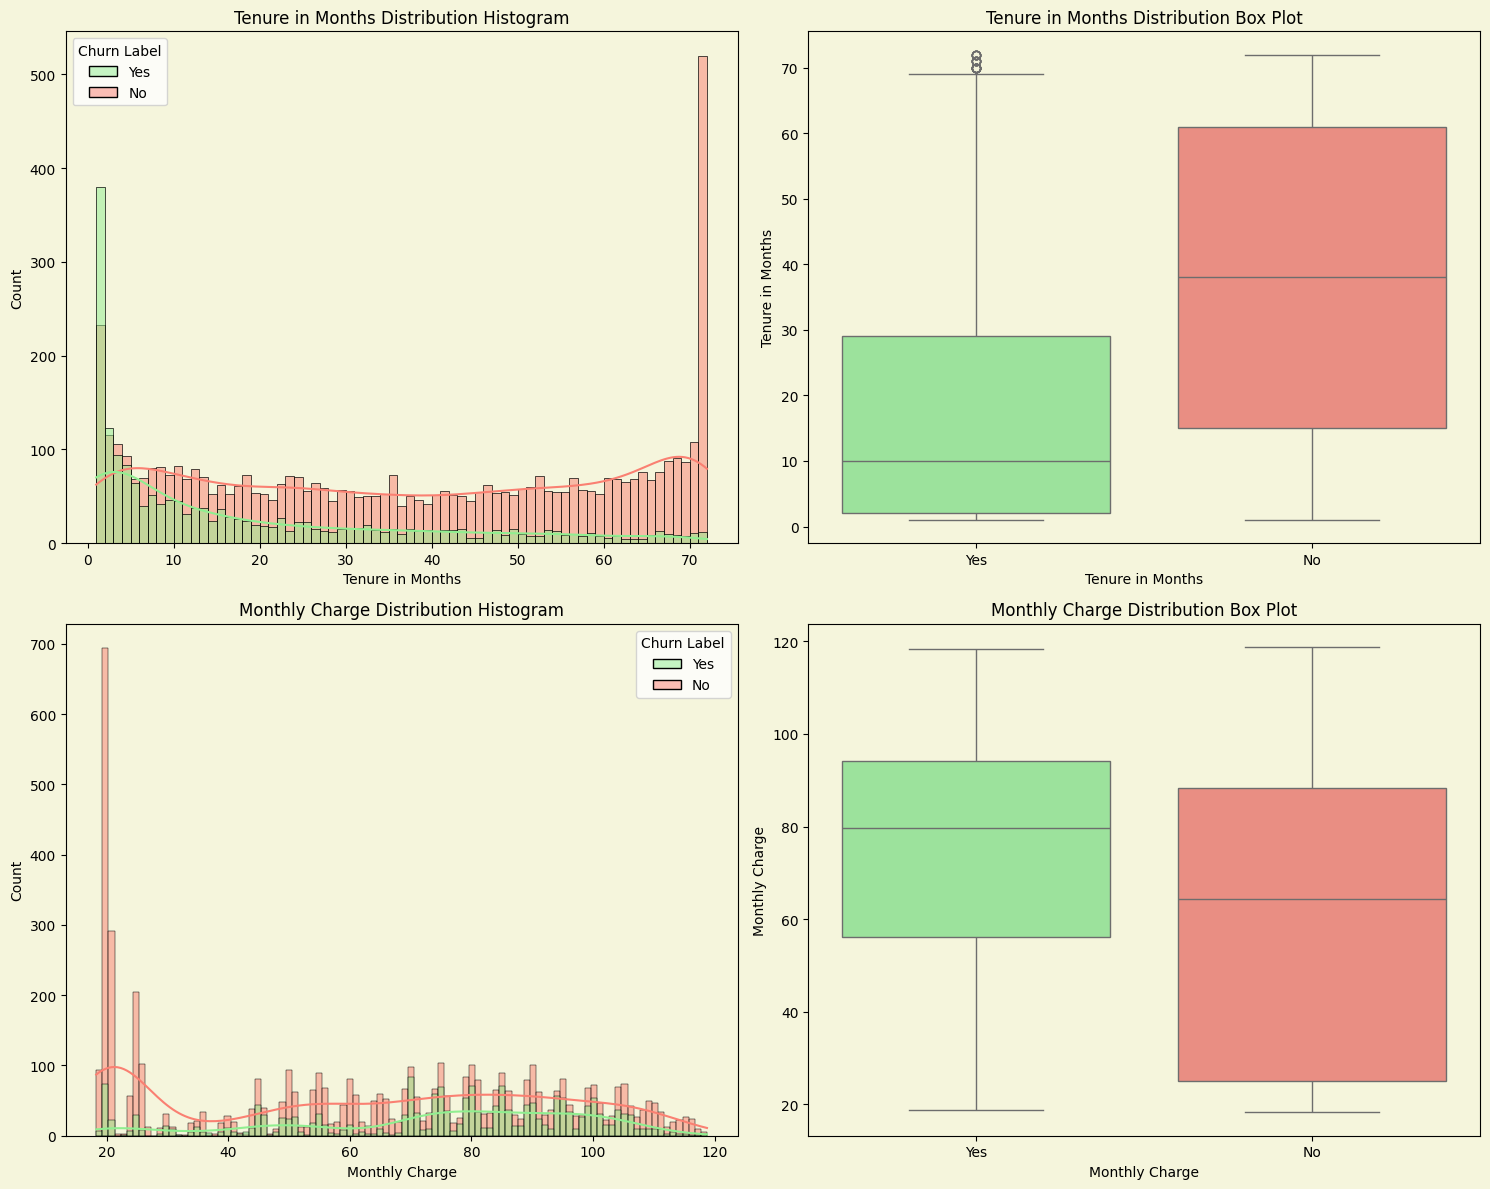

In [47]:
columns_of_interest = ['Tenure in Months', 'Monthly Charge']

# Set the figure size and background color
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.patch.set_facecolor('beige')

# Define a color palette for the box plots (e.g., lightgreen for retained, salmon for churned)
boxplot_palette = ['lightgreen', 'salmon']

# Loop through the columns of interest
for i, column in enumerate(columns_of_interest):
    # Histogram
    ax = axes[i, 0]
    sns.histplot(data=data, x=column, hue='Churn Label', binwidth=1, kde=True, ax=ax, palette=boxplot_palette)
    ax.set_facecolor('beige')
    ax.set_title(f'{column} Distribution Histogram')
    ax.set_xlabel(column)
    
    # Box Plot 
    ax = axes[i, 1]
    sns.boxplot(data=data, x='Churn Label', y=column, ax=ax, palette=boxplot_palette)
    ax.set_facecolor('beige')
    ax.set_title(f'{column} Distribution Box Plot')
    ax.set_xlabel(column)

# Adjust the layout
fig.tight_layout()
plt.show()

performed a scatterplot to see how monthly charges varied with total charges, and from the plot below, we can see both attributes have a positive relationship.

In simple terms: This means as monthly charges increase the total charges increase. Also, we can see that as total charges increase churn (the red dots) becomes less.

Relationship Between Total Charges and Churn With Respect To Contract
Observation: generally, churners were paying more total charges than non-churners

Observations:

The Columns "Total Charges" and "Total Revenue" are very highly correlated as can be expected by there names. So will keep only one of them "Total Revenue" and remove other.
The Columns "Monthly Charges" and "Total Long distance Charges" are also correlated to "Total Revenue" - we can also try and remove them.

/var/folders/06/vxhhrp_s73g1ph3rg4nd8rhr0000gn/T/ipykernel_20846/2850731941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Customer Status', y='Tenure in Months', palette='Set3')


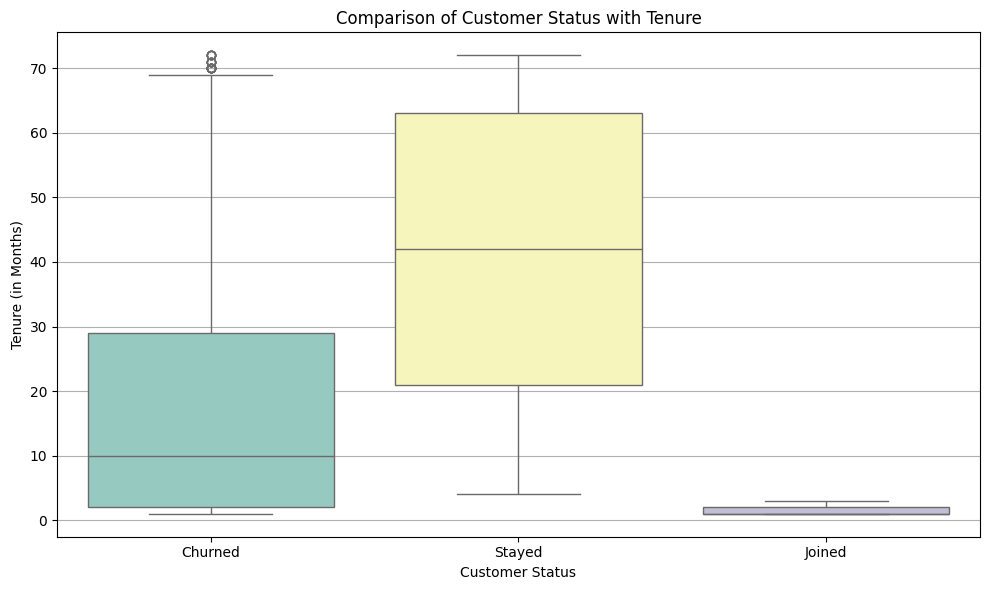

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Customer Status', y='Tenure in Months', palette='Set3')

plt.title('Comparison of Customer Status with Tenure')
plt.xlabel('Customer Status')
plt.ylabel('Tenure (in Months)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [49]:
# Encode 'Customer Status' with custom values
Encoded_Status = {'Stayed': 0, 'Churned': 1, 'Joined': 2}
data['Customer Status Encoded'] = data['Customer Status'].map(Encoded_Status)

# Verify encoding
print(data[['Customer Status', 'Customer Status Encoded']].head())


  Customer Status  Customer Status Encoded
0         Churned                        1
1         Churned                        1
2         Churned                        1
3         Churned                        1
4         Churned                        1


In [50]:
# Define the mapping
status_mapping = {'Stayed': 0, 'Churned': 1, 'Joined': 2}

# Create a new column named 'Encoded Data'
data['Encoded Data'] = data['Customer Status'].map(status_mapping)

# Optional: Display the first few rows to verify
print(data[['Customer Status', 'Encoded Data']].head())


  Customer Status  Encoded Data
0         Churned             1
1         Churned             1
2         Churned             1
3         Churned             1
4         Churned             1


In [51]:
data.columns

Index(['Gender', 'Age', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Country', 'State', 'City', 'Zip Code', 'Tenure Bin', 'Age Group',
       'Calculated Charges', 'Charge Difference', 'Customer Status Encoded',
      

In [52]:
data["City"].nunique()

1106

In [ ]:
data["State"].value_counts()

State
California    7043
Name: count, dtype: Int64

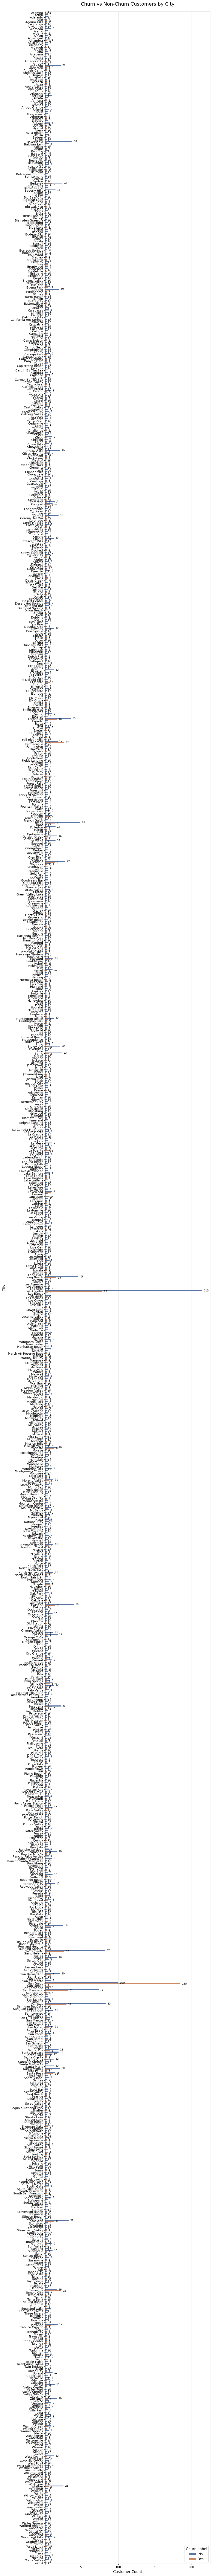

In [58]:

# Example starting from a churn DataFrame
city_churn = data.groupby(['City', 'Churn Label']).size().reset_index(name='Count')
city_churn_melted = city_churn  # You can use this name or rename as needed


plt.figure(figsize=(10, 120))
ax = sns.barplot(
    data=city_churn_melted, 
    y='City',  # Switch to vertical
    x='Count', 
    hue='Churn Label',
    palette=['#4c72b0', '#dd8452'],
    orient='h'
)

plt.title('Churn vs Non-Churn Customers by City', fontsize=16, pad=20)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.yticks(fontsize=10)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}', 
        (width, p.get_y() + p.get_height()/2), 
        ha='left', 
        va='center',
        xytext=(5, 0), 
        textcoords='offset points',
        fontsize=9
    )

plt.legend(
    title='Churn Label',
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    loc='lower right'
)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

<Axes: xlabel='Number of Referrals', ylabel='Count'>

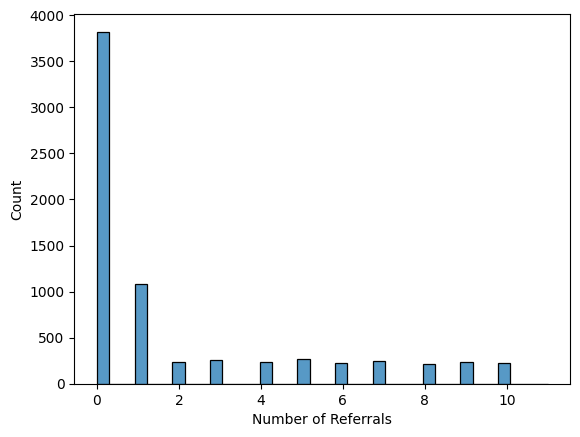

In [ ]:
# Refferals count made by customers Max value = 11
sns.histplot(data=data["Number of Referrals"])

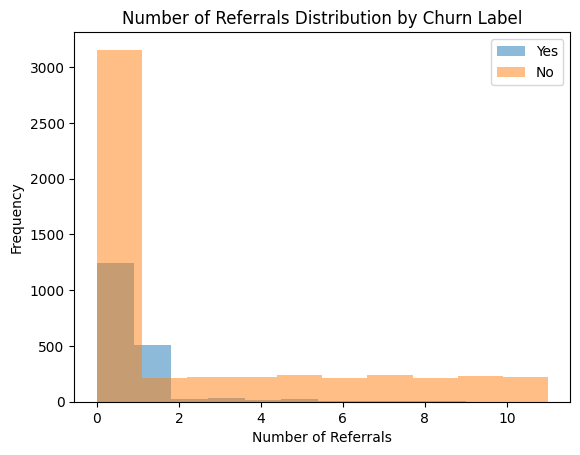

In [ ]:

# Referral with churn
churn_labels = data['Churn Label'].unique()

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate through churn labels and plot histograms of "Number of Referrals"
for label in churn_labels:
    referrals = data[data['Churn Label'] == label]['Number of Referrals']
    ax.hist(referrals, bins=10, alpha=0.5, label=label)  # Adjust bins as needed

ax.set_xlabel('Number of Referrals')
ax.set_ylabel('Frequency')
ax.set_title('Number of Referrals Distribution by Churn Label')
ax.legend()
plt.show()


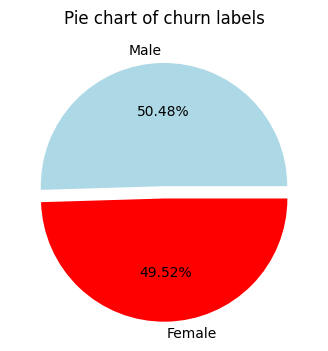

In [ ]:
# Main
# Gender data distribution

churn_label_count = data["Gender"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Pie chart of churn labels")
plt.show()

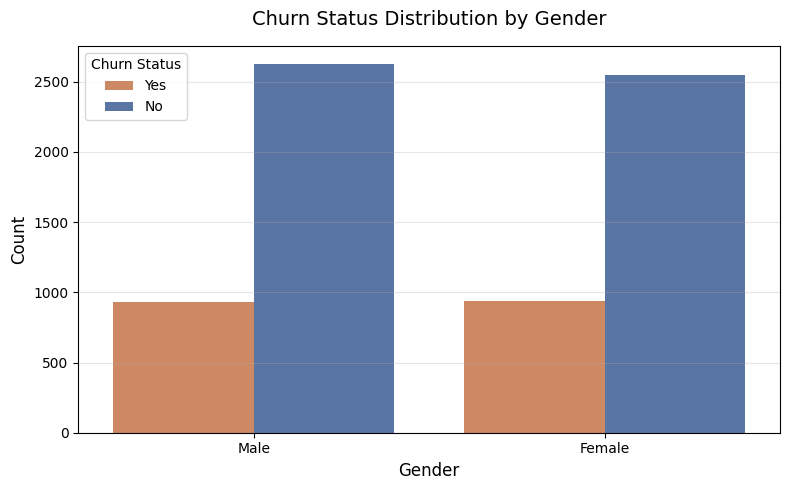

In [ ]:
# Gender based customer churn data
plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x='Gender',
    hue='Churn Label',
    palette={'No': '#4c72b0', 'Yes': '#dd8452'}
)

plt.title('Churn Status Distribution by Gender', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
data.sample(5)

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Offer,...,Country,State,City,Zip Code,Tenure Bin,Age Group,Calculated Charges,Charge Difference,Customer Status Encoded,Encoded Data
4581,Male,53,No,Yes,Yes,3,Yes,3,72,<NA>,...,United States,California,Richvale,95974,"(60, 120]",50-59,3520.8,6.20,0,0
6625,Male,37,No,Yes,Yes,3,Yes,7,70,<NA>,...,United States,California,Meadow Vista,95722,"(60, 120]",30-39,7430.5,44.60,0,0
5784,Male,58,No,No,Yes,2,No,0,18,Offer D,...,United States,California,Playa Del Rey,90293,"(12, 24]",50-59,821.7,-74.50,0,0
6284,Female,34,No,No,No,0,No,0,15,Offer D,...,United States,California,San Bruno,94066,"(12, 24]",30-39,732.0,-11.90,0,0
4447,Male,22,No,No,No,0,No,0,3,<NA>,...,United States,California,Fortuna,95540,"(0, 6]",19-29,271.2,-2.75,2,2


In [ ]:
# checking for total columns
data.columns

Index(['Gender', 'Age', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Country', 'State', 'City', 'Zip Code', 'Tenure Bin', 'Age Group',
       'Calculated Charges', 'Charge Difference', 'Customer Status Encoded',
      

In [ ]:
# Dropping unwanted data
data = data.drop(['Married','Dependents','Number of Dependents','Offer','Payment Method','Country','State','Zip Code','Churn Value'], axis=1)

In [ ]:
# Dropping more unwanted columns
data = data.drop(['Senior Citizen','Referred a Friend','Multiple Lines','Avg Monthly GB Download','Paperless Billing','Customer Status Encoded'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   string  
 1   Age                                7043 non-null   int64   
 2   Senior Citizen                     7043 non-null   string  
 3   Referred a Friend                  7043 non-null   string  
 4   Number of Referrals                7043 non-null   int64   
 5   Tenure in Months                   7043 non-null   int64   
 6   Phone Service                      7043 non-null   string  
 7   Avg Monthly Long Distance Charges  7043 non-null   float64 
 8   Multiple Lines                     7043 non-null   string  
 9   Internet Service                   7043 non-null   string  
 10  Internet Type                      7043 non-null   string  
 11  Avg Monthly GB Download            7043 non

### Final Cleaned Dataset

In [ ]:
data.to_excel("Cleaned.xlsx", index=False)  

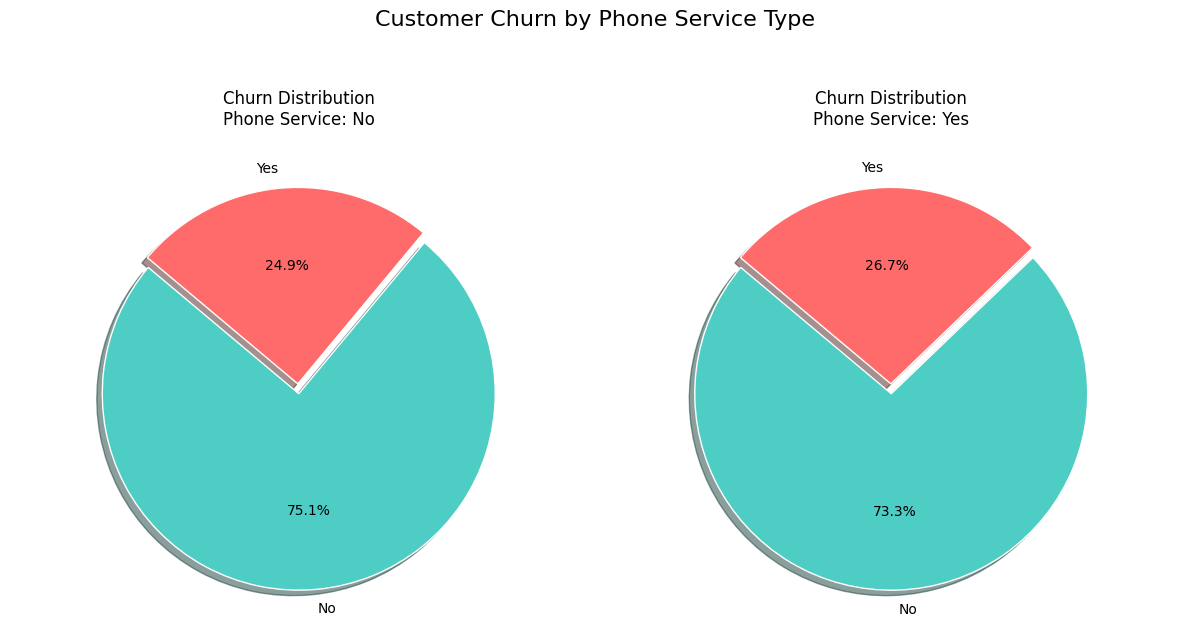

In [ ]:
 
# Group by Phone Service and Churn Label
grouped = data.groupby(['Phone Service', 'Churn Label']).size().unstack()

# Plot exploded pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#4ECDC4', '#FF6B6B']  # Blue for retained, red for churned
explode = (0.05, 0)  # "Pops out" the first slice (Churn Label)

for i, service in enumerate(grouped.index):
    axes[i].pie(
        grouped.loc[service],
        labels=grouped.columns,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,  # Added explosion effect
        shadow=True,      # Optional: adds depth
        wedgeprops={'edgecolor': 'white'}  # Clean edges
    )
    axes[i].set_title(f'Churn Distribution\nPhone Service: {service}', pad=20)
    axes[i].axis('equal')
# Add overall title
plt.suptitle('Customer Churn by Phone Service Type', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

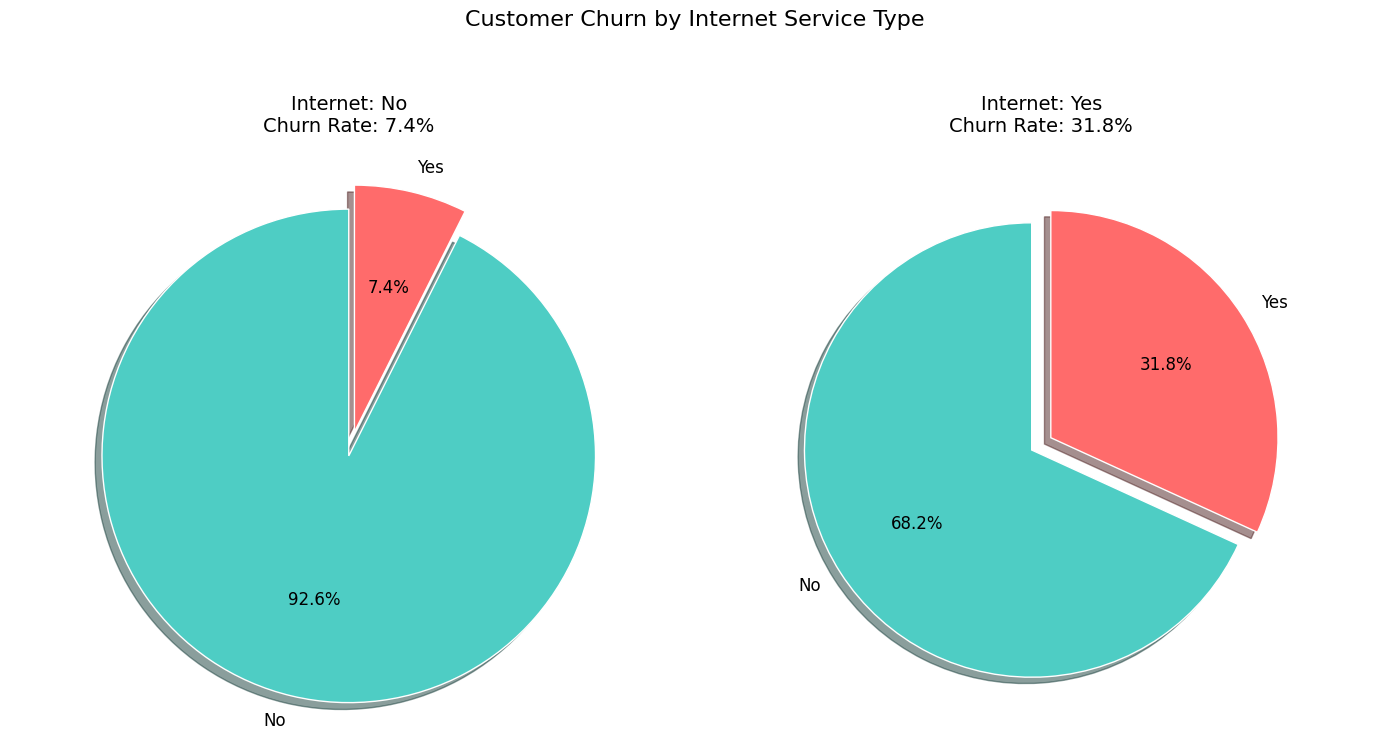

In [ ]:
 
# Group by Internet Service and Churn Label
grouped = data.groupby(['Internet Service', 'Churn Label']).size().unstack()

# Plot exploded pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
colors = ['#4ECDC4', '#FF6B6B']  # Teal for retained, coral for churned
explode = (0, 0.1)  # Explode the churn segment (2nd slice)

for i, service in enumerate(grouped.index):
    axes[i].pie(
        grouped.loc[service],
        labels=grouped.columns,
        autopct=lambda p: f'{p:.1f}%' if p > 5 else '',  # Hide small percentages
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )
    axes[i].set_title(
        f'Internet: {service}\nChurn Rate: {grouped.loc[service, "Yes"]/grouped.loc[service].sum():.1%}', 
        fontsize=14,
        pad=20
    )
    axes[i].axis('equal')

# Add overall title
plt.suptitle('Customer Churn by Internet Service Type', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,Age,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,Calculated Charges,Charge Difference,Encoded Data
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,1.951867,32.386767,22.958954,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755,2280.228234,0.153030,0.394292
std,16.750352,3.001199,24.542061,15.448113,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152,2264.155029,67.202778,0.606466
min,19.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000,18.800000,-370.850000,0.000000
25%,32.000000,0.000000,9.000000,9.210000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000,396.275000,-28.600000,0.000000
50%,46.000000,0.000000,29.000000,22.890000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000,1393.600000,0.000000,0.000000
75%,60.000000,3.000000,55.000000,36.395000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000,3786.100000,28.500000,1.000000
max,80.000000,11.000000,72.000000,49.990000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000,8550.000000,373.250000,2.000000


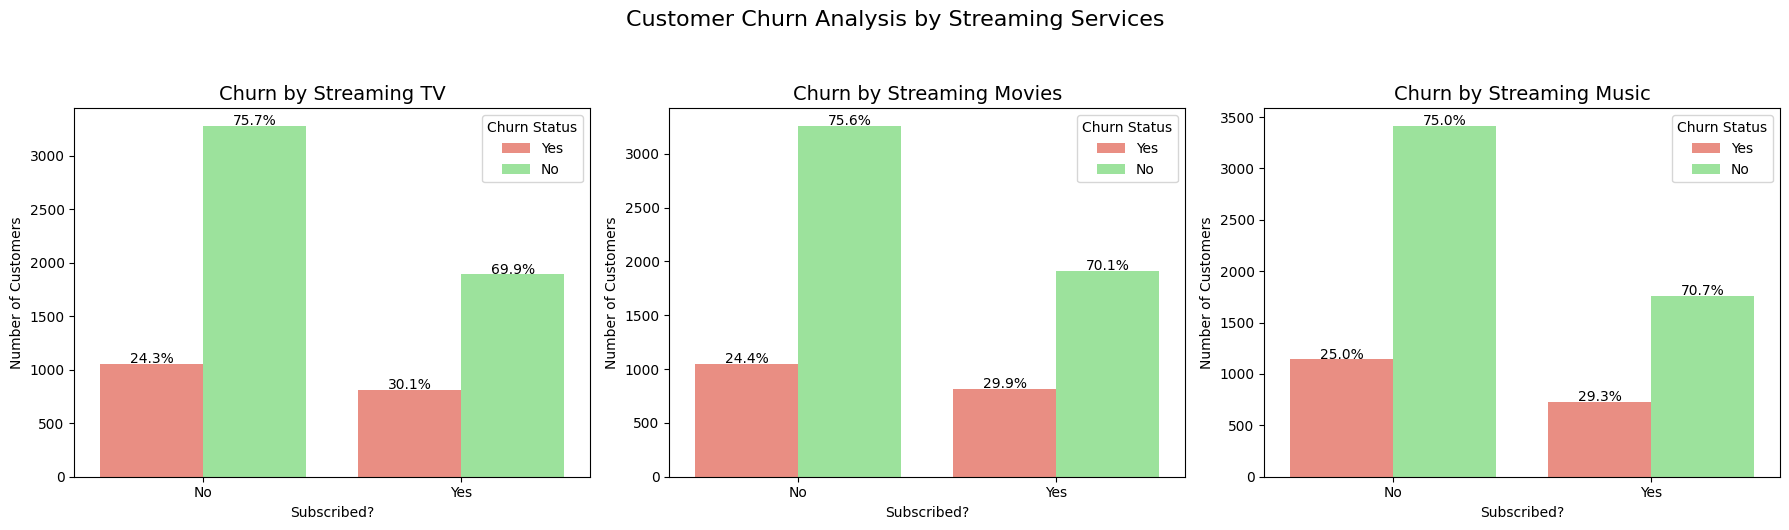

In [ ]:
 
# Define streaming services to analyze
columns = ['Streaming TV', 'Streaming Movies', 'Streaming Music']

# Set up subplots (1 row x 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Wider figure to accommodate 3 plots

# Plot each countplot
for i, col in enumerate(columns):
    # Create countplot
    sns.countplot(
        x=col, 
        data=data, 
        ax=axes[i], 
        hue='Churn Label',
        palette={'Yes': 'salmon', 'No': 'lightgreen'},
        order=['No', 'Yes']  # Consistent order for all plots
    )
    
    # Customize each subplot
    axes[i].set_title(f'Churn by {col}', fontsize=14)
    axes[i].set_xlabel('Subscribed?')
    axes[i].set_ylabel('Number of Customers')
    axes[i].legend(title='Churn Status')
    
    # Add percentage labels
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            # Calculate percentage within each subscription group
            x_pos = p.get_x() + p.get_width()/2
            subscribed = 'Yes' if x_pos > 0.5 else 'No'
            total = len(data[data[col] == subscribed])
            percentage = (height / total) * 100
            
            axes[i].text(
                x_pos,
                height + 5,
                f'{percentage:.1f}%',
                ha='center',
                fontsize=10
            )

# Adjust layout
plt.suptitle('Customer Churn Analysis by Streaming Services', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

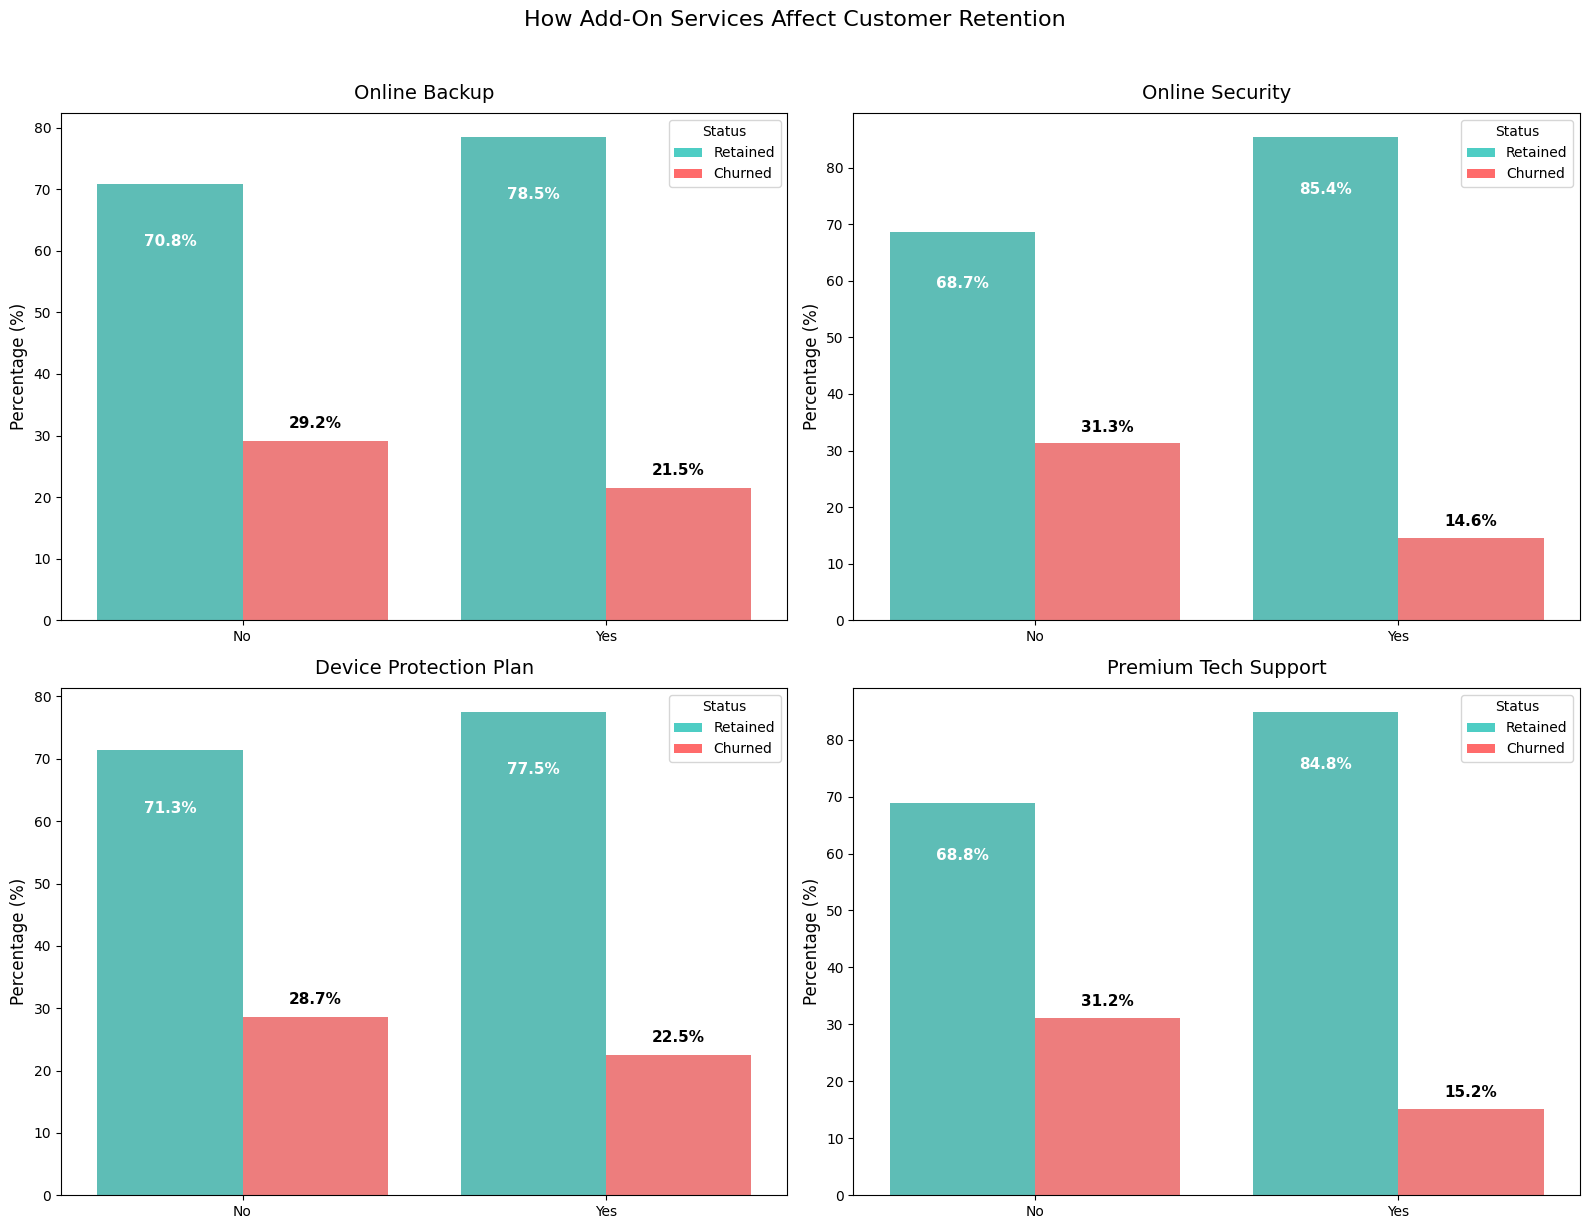

In [ ]:
 
# Define services to analyze
services = ['Online Backup', 'Online Security', 'Device Protection Plan', 'Premium Tech Support']

# Set color palette
churn_palette = {'Yes': '#ff6b6b', 'No': '#4ecdc4'}

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, service in enumerate(services):
    # Calculate percentages
    plot_data = (data.groupby(service)['Churn Label']
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('Percentage')
                 .reset_index())
    
    # Create plot
    ax = sns.barplot(
        data=plot_data,
        x=service,
        y='Percentage',
        hue='Churn Label',
        ax=axes[i],
        palette=churn_palette,
        order=['No', 'Yes']
    )
    
    # Customize
    axes[i].set_title(f'{service}', fontsize=14, pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage (%)', fontsize=12)
    
    # Create custom legend
    legend_elements = [
        Patch(facecolor=churn_palette['No'], label='Retained'),
        Patch(facecolor=churn_palette['Yes'], label='Churned')
    ]
    axes[i].legend(handles=legend_elements, title='Status')
    
    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 1:  # Only label significant bars
            ax.text(
                p.get_x() + p.get_width()/2.,
                height - 10 if height > 50 else height + 2,
                f'{height:.1f}%',
                ha='center',
                fontsize=11,
                color='white' if height > 50 else 'black',
                weight='bold'
            )

plt.suptitle('How Add-On Services Affect Customer Retention', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

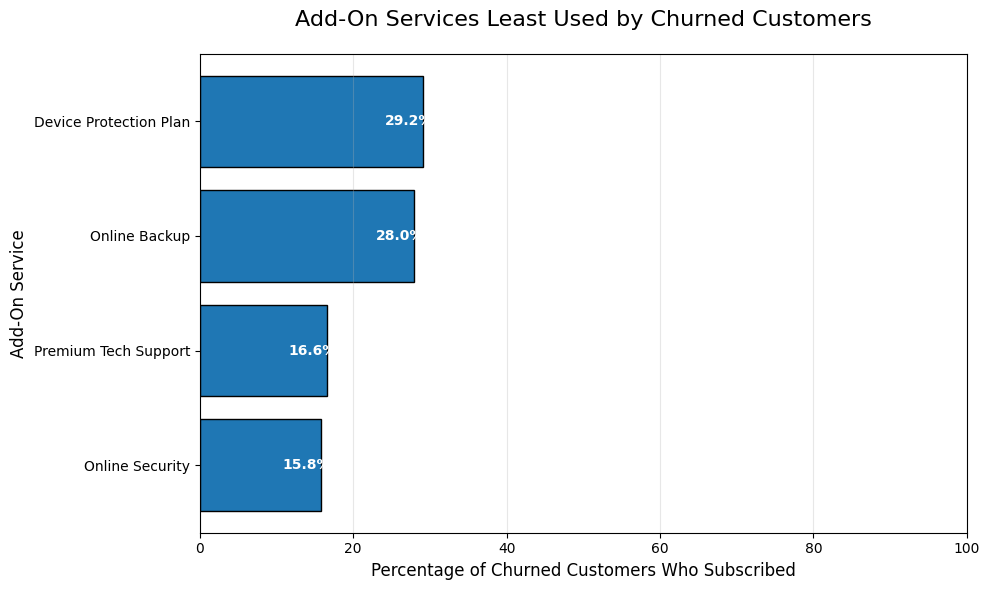

In [ ]:
# Filter only churned customers
churned = data[data['Churn Label'] == 'Yes']

# Calculate subscription rates for churned customers
subscription_rates = churned[['Online Backup', 'Online Security', 
                             'Device Protection Plan', 'Premium Tech Support']]\
                             .apply(lambda x: x.value_counts(normalize=True).get('Yes', 0))

# Sort from least to most subscribed
subscription_rates = subscription_rates.sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(subscription_rates.index, subscription_rates.values * 100, 
                color='#1f77b4', edgecolor='black')

# Add percentages on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5 if width > 5 else width + 1,  # Position inside short bars
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             va='center',
             color='white' if width > 5 else 'black',
             weight='bold')

plt.title('Add-On Services Least Used by Churned Customers', pad=20, fontsize=16)
plt.xlabel('Percentage of Churned Customers Who Subscribed', fontsize=12)
plt.ylabel('Add-On Service', fontsize=12)
plt.xlim(0, 100)  # Ensure scale goes to 100%
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

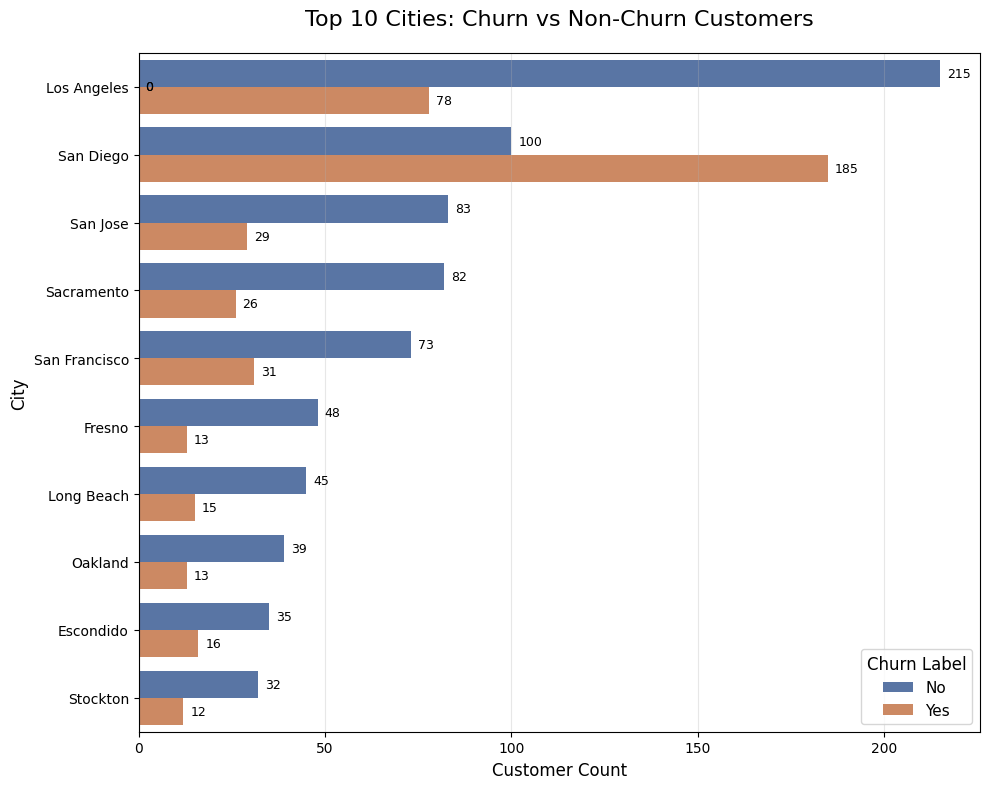

In [60]:
# Get top 10 cities by total customer count
top_cities = city_churn_melted.groupby('City')['Count'].sum().nlargest(10).index

# Filter data for top cities only
top_city_data = city_churn_melted[city_churn_melted['City'].isin(top_cities)]

# Create plot with adjusted height (shorter since we're showing fewer cities)
plt.figure(figsize=(10, 8))  # Reduced height from 120 to 8 for 10 cities
ax = sns.barplot(
    data=top_city_data, 
    y='City',
    x='Count', 
    hue='Churn Label',
    palette=['#4c72b0', '#dd8452'],
    orient='h',
    order=top_cities  # Ensure sorted by total count
)

plt.title('Top 10 Cities: Churn vs Non-Churn Customers', fontsize=16, pad=20)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.yticks(fontsize=10)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}', 
        (width, p.get_y() + p.get_height()/2), 
        ha='left', 
        va='center',
        xytext=(5, 0), 
        textcoords='offset points',
        fontsize=9
    )

plt.legend(
    title='Churn Label',
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    loc='lower right'
)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# mapping 
data['Churn Label'] = data['Churn Label'].map({'Yes': 0, 'No': 1})

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant numeric columns
df_corr = data[['Monthly Charge','Encoded Data','Number of Referrals','Total Charges',
              'Tenure in Months','Total Revenue','Churn Score','CLTV',
              'Satisfaction Score','Age','Churn Label']]

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))   
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, 
    vmax=1,
    annot_kws={'size': 10, 'weight': 'bold'},
    fmt='.2f',   
    linewidths=0.5,
    square=True   
)

# Enhance title and labels
plt.title('Feature Correlation Matrix', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'Yes'

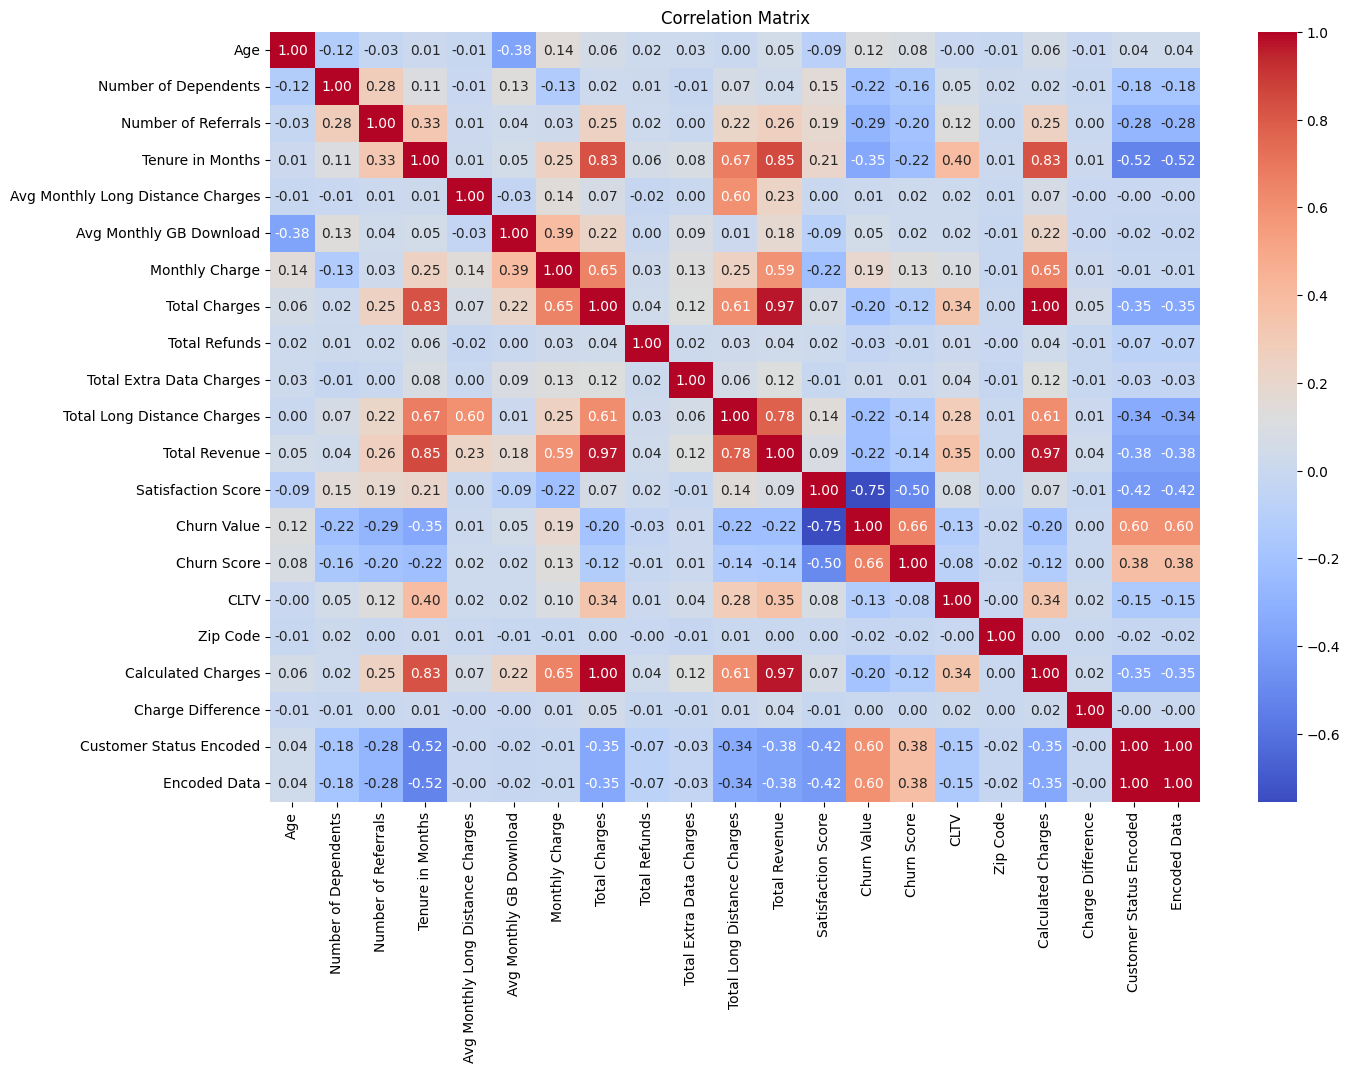

In [ ]:
# Overall Correlations among fields 
df_corr = data.select_dtypes(include=['number'])
corr_matrix = df_corr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Conclusion

#### The churn analysis highlights that customer age, tenure, contract type, and value-added services are key factors influencing retention.
#### High churn rates among fiber optic users and monthly subscribers, especially in areas like San Diego, signal areas for improvement. 
#### Bundled services and longer-term contracts reduce churn, while third-party streaming offerings may weaken loyalty. By implementing targeted,
#### department-specific strategies based on these insights, organizations can strengthen customer satisfaction, loyalty, and long-term value.